In [7]:
# Idea: we don't need to do the full propagation for every mode given that most of it is going to be blank.
# Some form of run-length encoding or maybe a partial-rank SVD would be useful.

from hcipy import *
import numpy as np
from matplotlib import pyplot as plt

N = 8
D = 9.96
pupil_grid = make_pupil_grid(N, D)
sps = int(N * 40/128)
aperture = circular_aperture(D)

In [8]:
# find the first spot for which aperture != 0

def make():
    for i in range(N):
        for j in range(N):
            wf = Wavefront(aperture(pupil_grid))
            wf.electric_field.shape = (N, N)
            l = wf.electric_field.tolist()
            if np.real(l[i][j]) > 0:
                l[i][j] = 0
                wf.electric_field = Field(np.asarray(l).ravel(), wf.grid)
                return wf

one_pixel_off = make()

In [9]:
imshow_field(one_pixel_off.intensity)

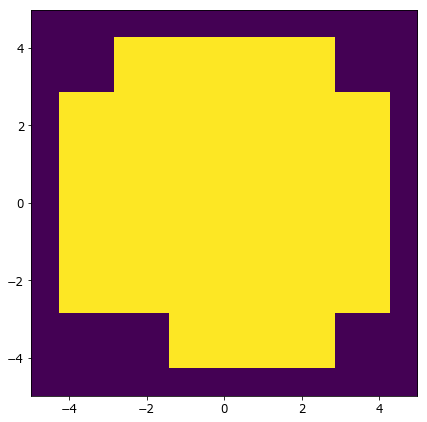

In [10]:
plt.show()

In [16]:
keck_pyramid = PyramidWavefrontSensorOptics(pupil_grid, pupil_separation=1, num_pupil_pixels=2)
py_output = keck_pyramid.forward(make())

In [17]:
imshow_field(py_output.intensity)

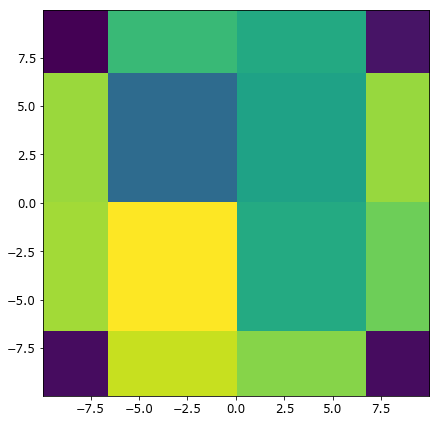

In [18]:
plt.show()

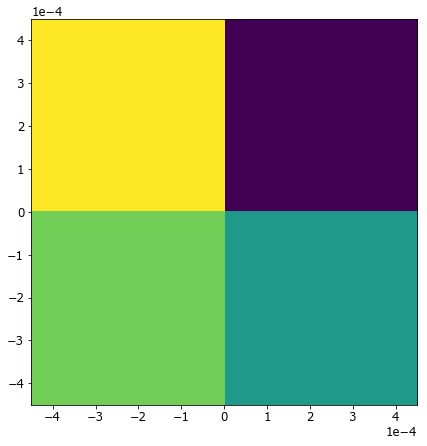

In [25]:
def get_sub_images(intensity):
    pyramid_grid = make_pupil_grid(N, D_grid)
    images = Field(np.asarray(intensity).ravel(), pyramid_grid)
    pysize = int(np.sqrt(images.size))
    images.shape = (pysize, pysize)

    sub_images = [images[pysize-sps-1:pysize-1, pysize-sps-1:pysize-1],
                  images[pysize-sps-1:pysize-1, 0:sps],
                  images[0:sps, 0:sps],
                  images[0:sps, pysize-sps-1:pysize-1]]
    subimage_grid = make_pupil_grid(sps, D_grid * sps / N)
    for count, img in enumerate(sub_images):
        img = img.ravel()
        img.grid = subimage_grid
        sub_images[count] = img
    return sub_images

D_grid = 3.6e-3
imshow_field(get_sub_images(py_output.intensity)[3])
plt.show()

In [26]:
print(py_output.intensity[])

[ 0.00759262  0.08277499  0.07457504  0.00745009  0.07809396  0.08995992
  0.05669908  0.07104122  0.07706339  0.03455633  0.05376788  0.07675177
  0.00469017  0.06243271  0.05658681  0.00908156]
